# Part - A

In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
# Create your first MLP in Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import numpy
import pandas as pd

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
#Read the dataset
f= pd.read_csv('forestfires.csv')
f

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
#To find whether there are any existing null values or not
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
#Count of duplicated rows
f[f.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
f1=f.drop_duplicates()
f1.head(60)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


<AxesSubplot:>

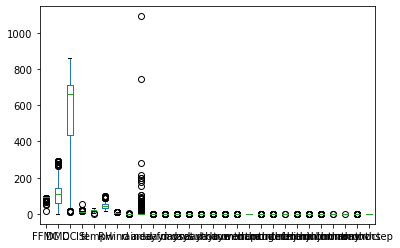

In [8]:
#Outlier Detection
f1.plot(kind='box')

<AxesSubplot:>

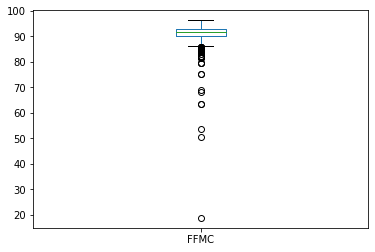

In [9]:
f1.FFMC.plot(kind='box')

In [10]:
f1.FFMC.describe()

count    509.000000
mean      90.618075
std        5.555527
min       18.700000
25%       90.200000
50%       91.600000
75%       92.900000
max       96.200000
Name: FFMC, dtype: float64

In [11]:
IQR = 92.900000 - 90.200000
IQR

2.700000000000003

In [12]:
#Calculation of lower fence
lower_fence = 90.200000 - (1.5*IQR)
lower_fence

86.15

In [13]:
index=f1[f1.FFMC<86.15].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

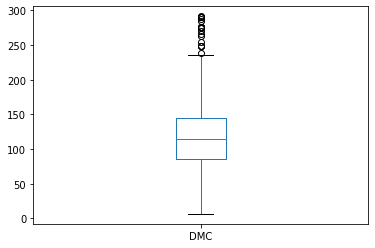

In [14]:
f1.DMC.plot(kind='box')

In [15]:
f1.DMC.describe()

count    456.000000
mean     119.788158
std       59.980378
min        6.600000
25%       85.250000
50%      114.300000
75%      145.400000
max      291.300000
Name: DMC, dtype: float64

In [16]:
IQR = 145.400000 - 85.250000
IQR

60.150000000000006

In [17]:
#Calculation of upper fence
upper_fence = 60.150000000000006 + (1.5*IQR)
upper_fence

150.375

In [18]:
index=f1[f1.DMC>150.375].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

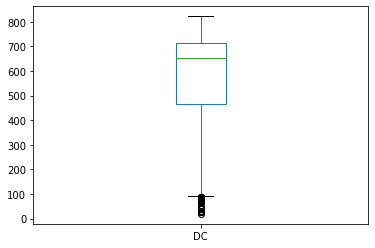

In [19]:
f1.DC.plot(kind='box')

In [20]:
f1.DC.describe()

count    356.000000
mean     547.388764
std      242.692661
min       18.700000
25%      464.425000
50%      654.100000
75%      714.000000
max      822.800000
Name: DC, dtype: float64

In [21]:
IQR = 714.000000 - 464.425000
IQR

249.575

In [22]:
#Calculation of lower fence
lower_fence = 464.425000 - (1.5*IQR)
lower_fence

90.06250000000006

In [23]:
index=f1[f1.DC<90.06250000000006].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

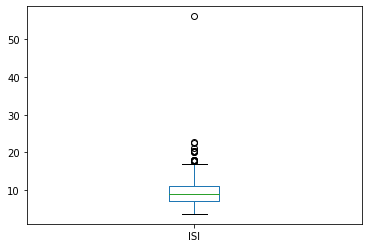

In [24]:
f1.ISI.plot(kind='box')

In [25]:
f1.ISI.describe()

count    315.000000
mean       9.869206
std        4.520157
min        3.700000
25%        7.000000
50%        8.900000
75%       11.000000
max       56.100000
Name: ISI, dtype: float64

In [26]:
IQR = 11.000000 - 7.000000
IQR

4.0

In [27]:
#Calculation of upper fence
upper_fence = 11.000000 + (1.5*IQR)
upper_fence

17.0

In [28]:
index=f1[f1.ISI>17.0].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

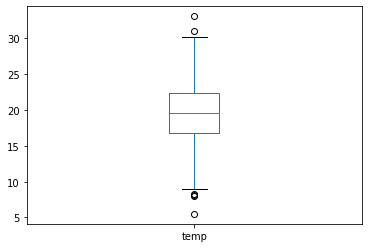

In [29]:
f1.temp.plot(kind='box')

In [30]:
f1.temp.describe()

count    296.000000
mean      19.419257
std        4.584373
min        5.500000
25%       16.800000
50%       19.600000
75%       22.325000
max       33.100000
Name: temp, dtype: float64

In [31]:
IQR = 22.325000 - 16.800000
IQR

5.524999999999999

In [32]:
#Calculation of lower fence
lower_fence = 16.800000 - (1.5*IQR)
lower_fence

8.512500000000003

In [33]:
#Calculation of upper fence
upper_fence = 22.325000 + (1.5*IQR)
upper_fence

30.612499999999997

In [34]:
index=f1[f1.temp<8.512500000000003].index
f1 = f1.drop(index,axis=0)

In [35]:
index=f1[f1.temp>30.612499999999997].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

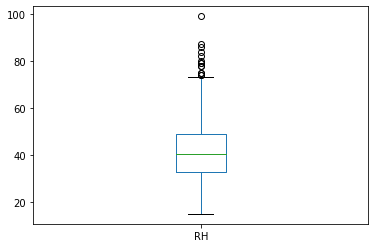

In [36]:
f1.RH.plot(kind='box')

In [37]:
f1.RH.describe()

count    290.000000
mean      42.513793
std       14.456287
min       15.000000
25%       33.000000
50%       40.500000
75%       49.000000
max       99.000000
Name: RH, dtype: float64

In [38]:
IQR = 49.000000 - 33.000000
IQR

16.0

In [39]:
#Calculation of upper fence
upper_fence = 49.000000 + (1.5*IQR)
upper_fence

73.0

In [40]:
index=f1[f1.RH>73.0].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

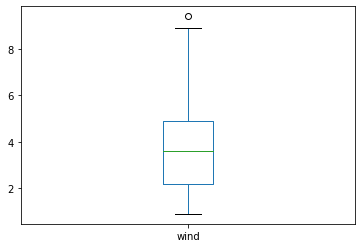

In [41]:
f1.wind.plot(kind='box')

In [42]:
f1.wind.describe()

count    276.000000
mean       3.725725
std        1.627589
min        0.900000
25%        2.200000
50%        3.600000
75%        4.900000
max        9.400000
Name: wind, dtype: float64

In [43]:
IQR = 4.900000 - 2.200000
IQR

2.7

In [44]:
#Calculation of upper fence
upper_fence = 4.900000 + (1.5*IQR)
upper_fence

8.950000000000001

In [45]:
index=f1[f1.wind>8.950000000000001].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

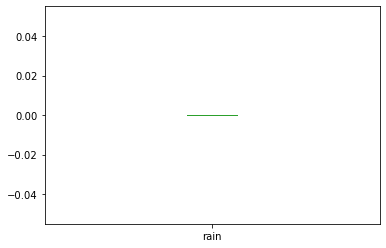

In [46]:
f1.rain.plot(kind='box')

In [47]:
f1.pop('month')
f1.head()

,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
1,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,...,0,0,0,0,0,0,0,1,0,small
2,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,...,0,0,0,0,0,0,0,1,0,small
5,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,small
6,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,small
8,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [48]:
f1.pop('day')
f1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,small
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,small
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,small


In [49]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
f1['size_category']=label_encoder.fit_transform(f1['size_category'])

In [50]:
f1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,1


In [51]:
x=f1.iloc[:,0:28]
y=f1.iloc[:,28]

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [54]:
#initializing ANN
model=Sequential()

In [55]:
#adding input and 1st hidden layer
model.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform',input_dim=28))
#adding 2nd hidden layer
model.add(Dense(units=8,activation='relu',kernel_initializer='he_uniform'))
#adding output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [56]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
#fit the model
model.fit(x_train,y_train,batch_size=10,epochs=150,validation_split=0.33)

Epoch 1/150
15/15 [==============================] - 1s 12ms/step - loss: 0.7251 - accuracy: 0.6054 - val_loss: 0.6128 - val_accuracy: 0.6712
Epoch 2/150
15/15 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.6054 - val_loss: 0.6045 - val_accuracy: 0.6849
Epoch 3/150
15/15 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6190 - val_loss: 0.5956 - val_accuracy: 0.7260
Epoch 4/150
15/15 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6599 - val_loss: 0.5889 - val_accuracy: 0.7397
Epoch 5/150
15/15 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6735 - val_loss: 0.5824 - val_accuracy: 0.7397
Epoch 6/150
15/15 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6871 - val_loss: 0.5777 - val_accuracy: 0.7534
Epoch 7/150
15/15 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.6803 - val_loss: 0.5732 - val_accuracy: 0.7534
Epoch 8/150


Epoch 59/150
15/15 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8231 - val_loss: 0.5347 - val_accuracy: 0.7397
Epoch 60/150
15/15 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8231 - val_loss: 0.5338 - val_accuracy: 0.7397
Epoch 61/150
15/15 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8231 - val_loss: 0.5351 - val_accuracy: 0.7397
Epoch 62/150
15/15 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8231 - val_loss: 0.5314 - val_accuracy: 0.7397
Epoch 63/150
15/15 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8231 - val_loss: 0.5286 - val_accuracy: 0.7397
Epoch 64/150
15/15 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8299 - val_loss: 0.5308 - val_accuracy: 0.7397
Epoch 65/150
15/15 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8367 - val_loss: 0.5289 - val_accuracy: 0.7397
Epoch 

15/15 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9320 - val_loss: 0.4704 - val_accuracy: 0.8219
Epoch 117/150
15/15 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9320 - val_loss: 0.4690 - val_accuracy: 0.8082
Epoch 118/150
15/15 [==============================] - 0s 3ms/step - loss: 0.1956 - accuracy: 0.9320 - val_loss: 0.4686 - val_accuracy: 0.8219
Epoch 119/150
15/15 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9320 - val_loss: 0.4706 - val_accuracy: 0.8219
Epoch 120/150
15/15 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.9320 - val_loss: 0.4671 - val_accuracy: 0.8219
Epoch 121/150
15/15 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9388 - val_loss: 0.4664 - val_accuracy: 0.8082
Epoch 122/150
15/15 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.9388 - val_loss: 0.4664 - val_accuracy: 0.8082
Epoch 123/150

In [58]:
y_pred=model.predict(x_test)

In [59]:
y_pred

array([[9.6670580e-01],
       [3.8659954e-01],
       [9.5869428e-01],
       [1.1589897e-01],
       [9.4135070e-01],
       [6.0930848e-04],
       [9.9513102e-01],
       [9.9018407e-01],
       [8.9117146e-01],
       [1.1300802e-01],
       [9.9997723e-01],
       [9.9980700e-01],
       [9.9935466e-01],
       [9.9908251e-01],
       [9.9712968e-01],
       [9.9982625e-01],
       [3.3528209e-03],
       [9.9999619e-01],
       [9.9181831e-01],
       [9.9616820e-01],
       [9.1080415e-01],
       [9.9800503e-01],
       [9.9841070e-01],
       [9.8937368e-01],
       [9.9400294e-01],
       [9.9667835e-01],
       [9.9606943e-01],
       [9.8603994e-01],
       [9.9625981e-01],
       [3.5620332e-01],
       [9.9622333e-01],
       [1.9702416e-05],
       [9.9624151e-01],
       [6.4402038e-01],
       [7.3697484e-01],
       [9.6159196e-01],
       [9.9764329e-01],
       [9.9996573e-01],
       [9.3322122e-01],
       [9.9117935e-01],
       [4.1246355e-02],
       [7.818959

In [60]:
#evaluating the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 0s/step - loss: 0.4070 - accuracy: 0.8727
accuracy: 87.27%


# Part - B

In [61]:
# Create your first MLP in Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import pandas as pd

In [63]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
#Read the dataset
g= pd.read_csv("gas_turbines.csv")
g

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [64]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [65]:
#Count of duplicated rows
g[g.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [66]:
g1= g.drop(['TEY'],axis=1)
g1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [67]:
TEY = g["TEY"]
g1 = pd.concat([g1,TEY], axis = 1)
g1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [68]:
y = g1.iloc[:, 10].values
for i in range(0, len(y)):
    y[i] = (y[i]*1)
    if y[i] < 400:
        y[i] = 1
    else:
        y[i] = 2

In [69]:
g1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,1.0
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,1.0
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,1.0
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,1.0
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,1.0
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,1.0
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,1.0
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,1.0
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,1.0


In [70]:
# Separate Target Variable and Predictor Variables
TargetVariable=['TEY']
Predictors=['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']
 
X=g1[Predictors].values
y=g1[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10527, 10)
(10527, 1)
(4512, 10)
(4512, 1)


In [71]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=12, input_dim=10, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=12, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
527/527 [==============================] - 1s 953us/step - loss: 8.4952e-08
Epoch 2/50
527/527 [==============================] - 0s 913us/step - loss: 6.6719e-10
Epoch 3/50
527/527 [==============================] - 0s 789us/step - loss: 6.5713e-11
Epoch 4/50
527/527 [==============================] - 0s 812us/step - loss: 2.0391e-11
Epoch 5/50
527/527 [==============================] - 1s 962us/step - loss: 2.2840e-09
Epoch 6/50
527/527 [==============================] - 1s 1ms/step - loss: 5.2082e-09
Epoch 7/50
527/527 [==============================] - 1s 985us/step - loss: 1.7844e-13
Epoch 8/50
527/527 [==============================] - 0s 787us/step - loss: 1.2870e-09
Epoch 9/50
527/527 [==============================] - 0s 644us/step - loss: 3.0380e-09
Epoch 10/50
527/527 [==============================] - 0s 610us/step - loss: 1.4546e-12
Epoch 11/50
527/527 [==============================] - 0s 592us/step - loss: 9.9043e-10
Epoch 12/50
527/527 [======================

In [72]:
import numpy as np

In [73]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 


In [74]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

<ipython-input-73-be8fc4c22e43>:33: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))


1 Parameters: batch_size: 5 - epochs: 5 Accuracy: -inf
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: -inf
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: -inf
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: -inf
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: -inf
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: -inf
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: -inf
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: -inf
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: -inf
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: -inf
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: -inf
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: -inf
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: -inf
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: -inf
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: -inf
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: -inf


In [75]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,Price,PredictedPrice
0,24.093,1010.2,75.821,4.0023,25.762,1092.5,550.25,12.219,1.2643,60.954,1.0,1.000029
1,20.450,1014.4,90.471,3.2106,20.085,1059.6,549.94,10.791,2.6937,56.658,1.0,1.000038
2,20.262,1012.5,82.892,4.5325,25.221,1089.9,549.62,12.126,1.9625,64.937,1.0,1.000032
3,26.862,1012.3,70.267,4.4266,25.965,1092.9,549.96,12.218,1.5712,64.836,1.0,1.000033
4,19.409,1006.3,90.525,3.1241,19.688,1056.9,550.01,10.466,2.2996,58.706,1.0,1.000031


In [76]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 99.9962759950588


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,Price,PredictedPrice,APE
0,24.093,1010.2,75.821,4.0023,25.762,1092.5,550.25,12.219,1.2643,60.954,1.0,1.000029,0.002885
1,20.450,1014.4,90.471,3.2106,20.085,1059.6,549.94,10.791,2.6937,56.658,1.0,1.000038,0.003779
2,20.262,1012.5,82.892,4.5325,25.221,1089.9,549.62,12.126,1.9625,64.937,1.0,1.000032,0.003242
3,26.862,1012.3,70.267,4.4266,25.965,1092.9,549.96,12.218,1.5712,64.836,1.0,1.000033,0.003266
4,19.409,1006.3,90.525,3.1241,19.688,1056.9,550.01,10.466,2.2996,58.706,1.0,1.000031,0.003099
